In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [71]:
data = pd.read_csv('../fraud_tools_team_ds_test/clean_data.csv')

In [72]:
data.shape

(7774, 9)

In [73]:
data.isnull().sum()

raw_log         0
user_id         0
timestamp       0
action          0
amount          0
currency        0
location        0
device          0
atm          6685
dtype: int64

In [74]:
data[data['currency']=='none'].shape

(2241, 9)

In [75]:
data[data['location']=='none'].shape

(968, 9)

In [76]:
data[data['device']=='none'].shape

(1081, 9)

In [77]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN
...,...,...,...,...,...,...,...,...,...
7769,user1000 2025-07-31 09:41:19 withdrawal 966.27...,user1000,2025-07-31 09:41:19,withdrawal,966.27,none,glasgow,xiaomi mi 11,NaN
7770,usr:user1077|deposit|€730.81|leeds|2025-07-31 ...,user1077,2025-07-31 09:48:20,deposit,730.81,€,leeds,none,NaN
7771,2025-07-31 09:50:41 | user: user1043 | txn: to...,user1043,2025-07-31 09:50:41,top-up,4718.76,$,liverpool,nokia 3310,NaN
7772,2025-07-31 10:20:49 | user: user1087 | txn: tr...,user1087,2025-07-31 10:20:49,transfer,3756.03,€,manchester,iphone 13,NaN


In [78]:
data.dtypes

raw_log       object
user_id       object
timestamp     object
action        object
amount       float64
currency      object
location      object
device        object
atm           object
dtype: object

In [79]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='mixed', dayfirst=True)

In [80]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN
...,...,...,...,...,...,...,...,...,...
7769,user1000 2025-07-31 09:41:19 withdrawal 966.27...,user1000,2025-07-31 09:41:19,withdrawal,966.27,none,glasgow,xiaomi mi 11,NaN
7770,usr:user1077|deposit|€730.81|leeds|2025-07-31 ...,user1077,2025-07-31 09:48:20,deposit,730.81,€,leeds,none,NaN
7771,2025-07-31 09:50:41 | user: user1043 | txn: to...,user1043,2025-07-31 09:50:41,top-up,4718.76,$,liverpool,nokia 3310,NaN
7772,2025-07-31 10:20:49 | user: user1087 | txn: tr...,user1087,2025-07-31 10:20:49,transfer,3756.03,€,manchester,iphone 13,NaN


# EDA

### Categorical data

In [81]:
def create_count_plot(data_frame,columns= []):
    # make a copy of dataframe
    df = data_frame.copy()
    figsize = (14, 8)     
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=figsize)
    
    axes = axes.flatten()
    for index, feature in enumerate(columns):
        sns.countplot(data = df,x = feature, ax = axes[index])
    plt.tight_layout()
    plt.show();

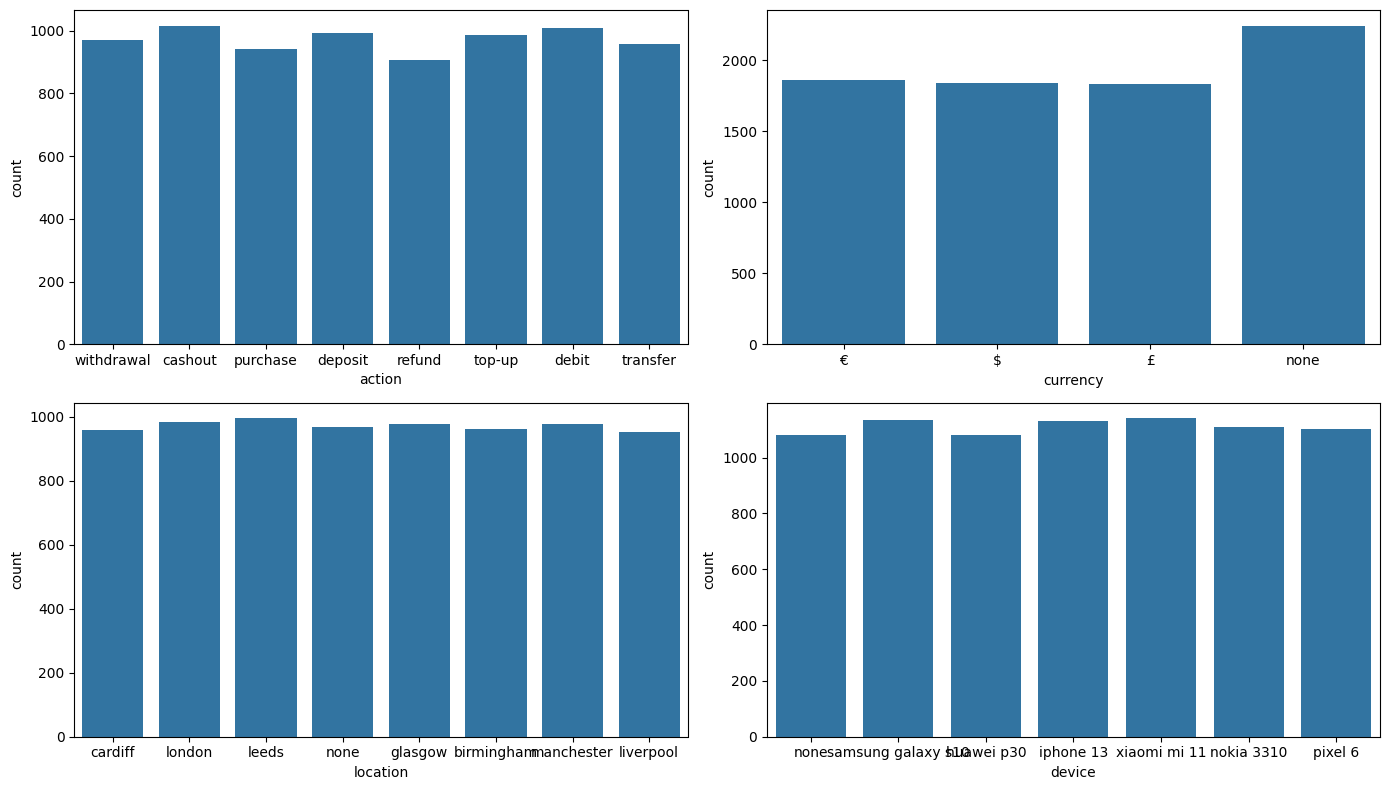

In [82]:
create_count_plot(data_frame=data, columns=['action', 'currency','location', 'device'])

- All distinct categorical variables are well represented (including missing category)
- Missing currency is more represented than any other currency
- All other currencies are well represented

In [83]:
def bar_chart_against_amount(data_frame,columns= []):
    # make a copy of dataframe
    df = data_frame.copy()
    
    figsize = (14, 8)     
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=figsize)
    
    axes = axes.flatten()
    for index, feature in enumerate(columns):
        bar = df[[feature, 'amount']].groupby([feature]).sum('amount').reset_index()
        sns.barplot(data=bar, x=feature, y='amount', ax = axes[index])
        
    plt.tight_layout()
    plt.show();

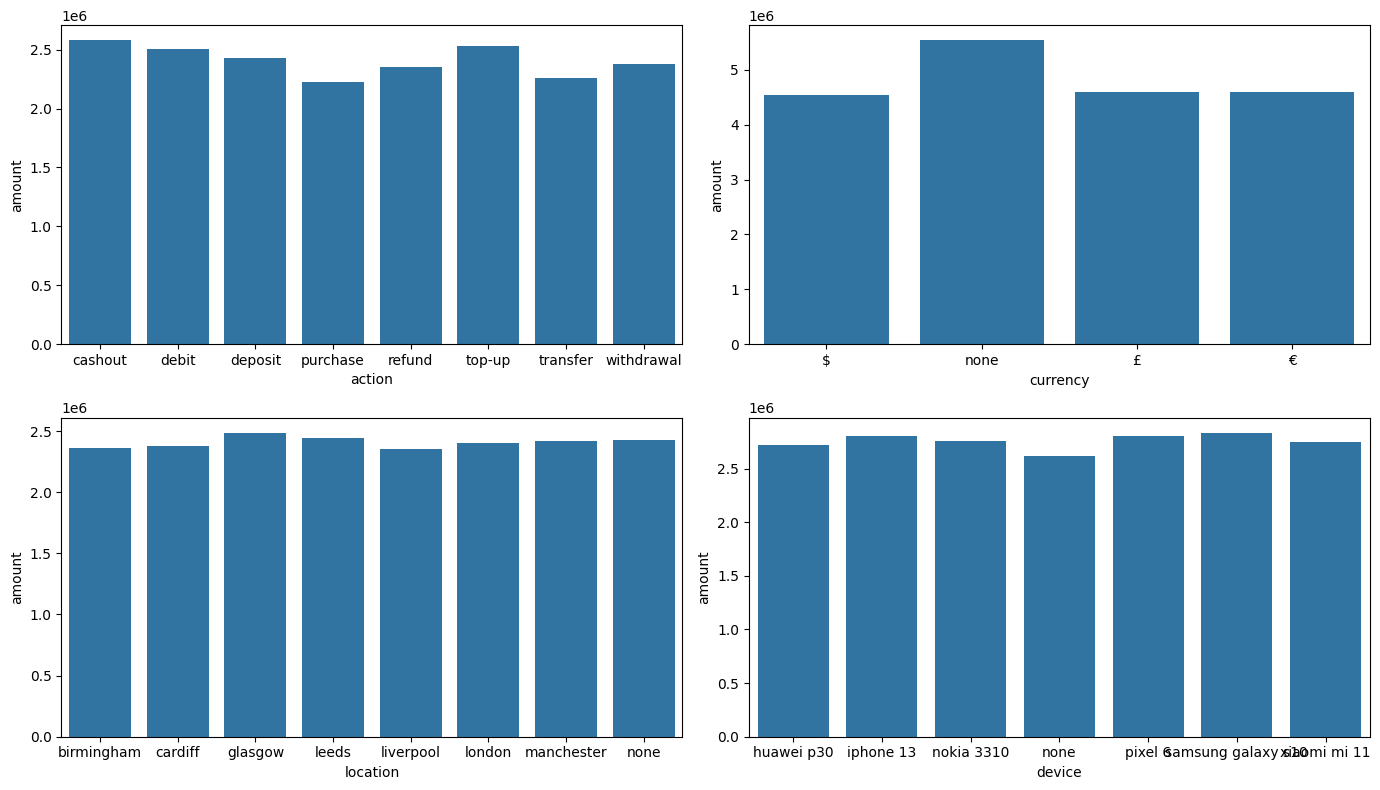

In [84]:
bar_chart_against_amount(data_frame=data, columns=['action', 'currency','location', 'device'])

The amount spent for each location is fairly even

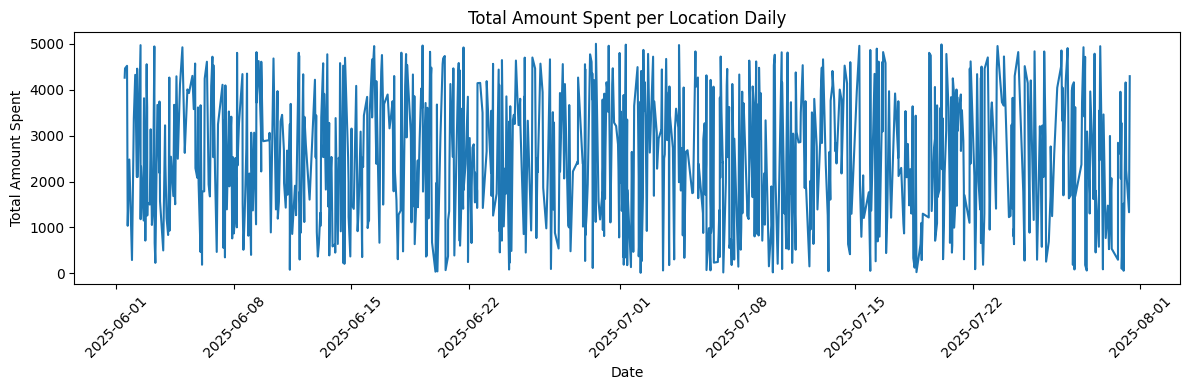

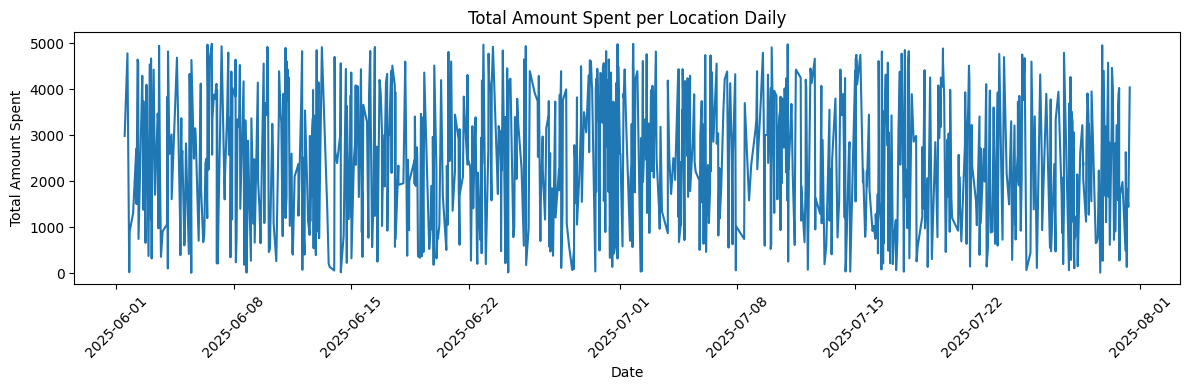

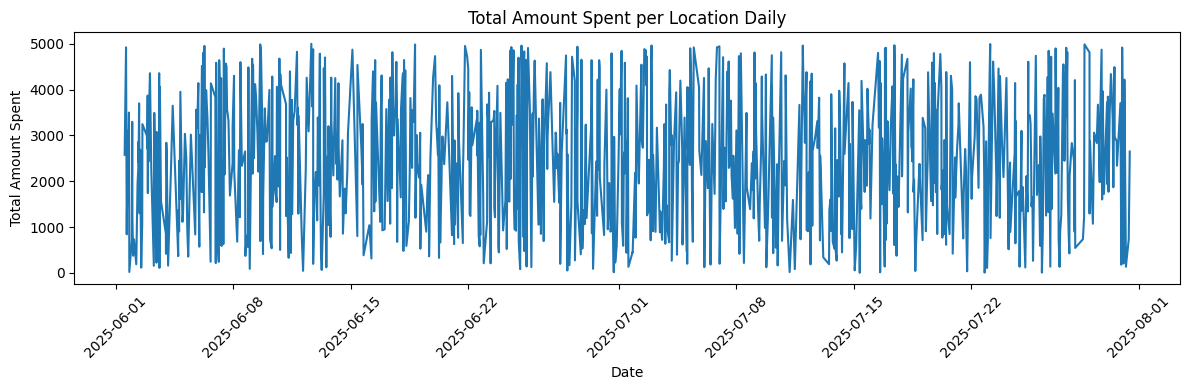

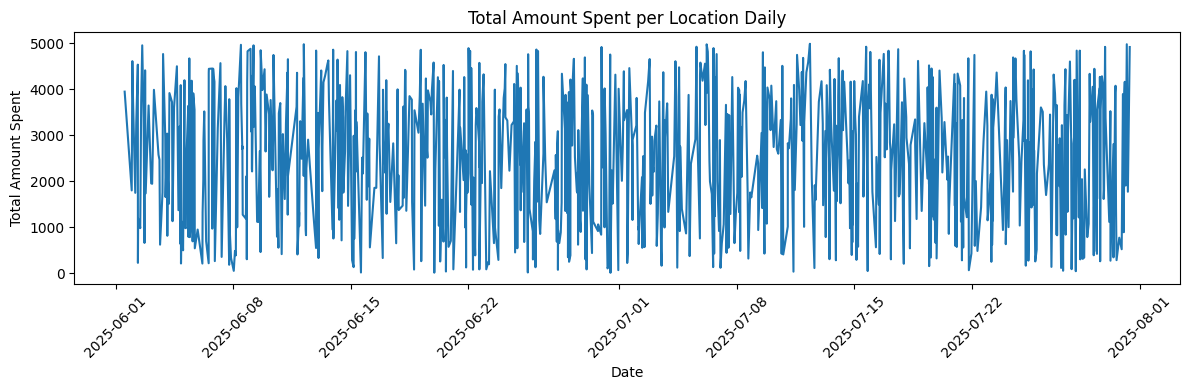

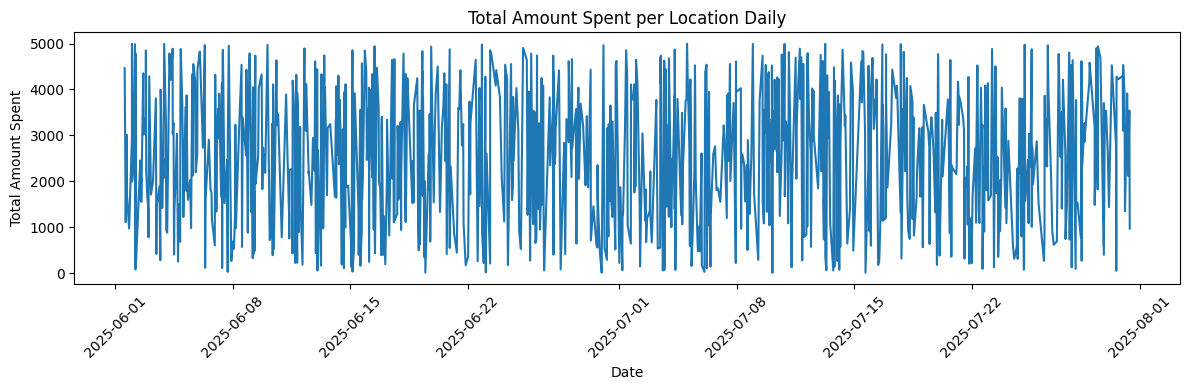

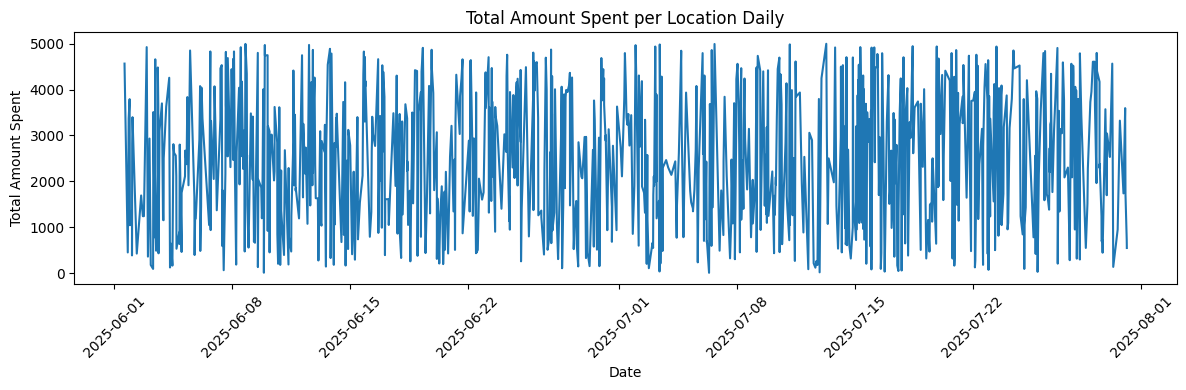

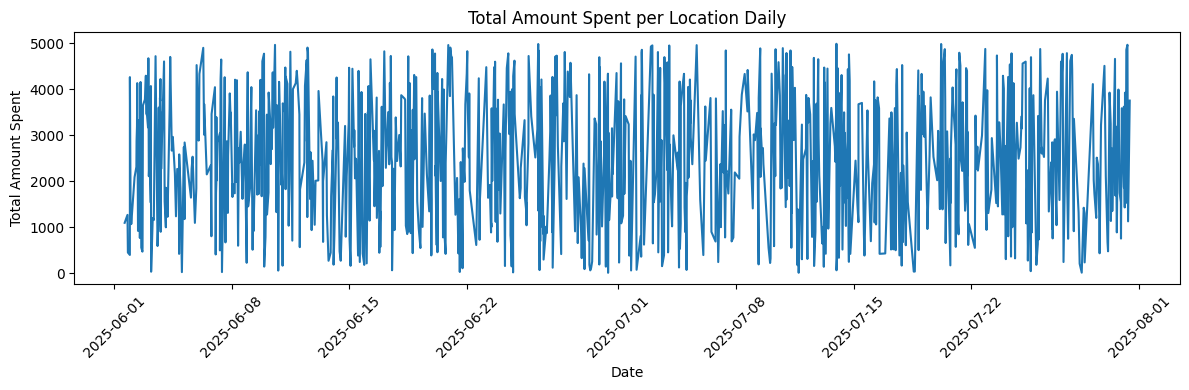

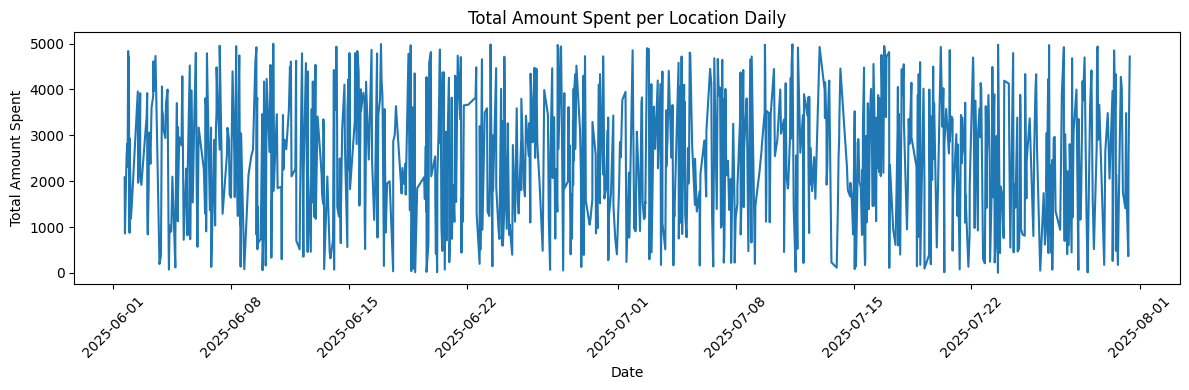

In [85]:
# 2. Group by location and date, and sum the amount
grouped = data.groupby(['timestamp', 'location'])['amount'].sum().reset_index()

# 3. Plot
for location in data['location'].unique():
    subset = grouped[grouped['location'] == location]
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=subset, x='timestamp', y='amount')
    plt.title('Total Amount Spent per Location Daily')
    plt.xlabel('Date')
    plt.ylabel('Total Amount Spent')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

 They all exhibit similar pattern over time, Ranging between near 0 and 5000 daily

In [86]:
categorical_df = data.select_dtypes(include='object')
categorical_df.head()

,raw_log,user_id,action,currency,location,device,atm
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,withdrawal,€,cardiff,none,NaN
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,cashout,$,london,samsung galaxy s10,atm
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,purchase,£,cardiff,huawei p30,NaN
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,deposit,none,leeds,iphone 13,NaN
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,refund,$,none,huawei p30,NaN


In [87]:
data['raw_log'].to_list()

['usr:user1093|withdrawal|€4259.25|cardiff|2025-06-01 11:41:41|none',
 '2025-06-01 12:03:31 - user=user1000 - action=cashout $2981.21 - atm: london - device=samsung galaxy s10',
 'usr:user1019|purchase|£4461.41|cardiff|2025-06-01 12:14:07|huawei p30',
 '2025-06-01 12:44:19::user1048::deposit::2575.66::leeds::iphone 13',
 '01/06/2025 12:48:18 ::: user1014 *** refund ::: amt:3949.98$ @ none <huawei p30>',
 '2025-06-01 13:36:33 | user: user1093 | txn: withdrawal of €4463.55 from glasgow | device: xiaomi mi 11',
 'user1082 2025-06-01 14:21:48 top-up 4565.68 birmingham nokia 3310',
 '2025-06-01 14:42:53 | user: user1029 | txn: debit of £4921.32 from leeds | device: none',
 'user1001 2025-06-01 15:05:41 cashout 4517.8 cardiff none',
 '2025-06-01 15:06:05::user1003::refund::1108.76::glasgow::huawei p30',
 '2025-06-01 15:16:41::user1028::cashout::1094.01::manchester::xiaomi mi 11',
 'user1027 2025-06-01 15:42:35 withdrawal 840.78 leeds nokia 3310',
 '2025-06-01 15:57:06 >> [user1031] did purch

In [88]:
 # Or dt.floor('D') to keep as datetime

In [89]:
def plot_series():
    data_1 = data.copy()
    data_1['timestamp'] = pd.to_datetime(data_1['timestamp'], format='mixed', dayfirst=True  )
    data_1['timestamp'] = data_1['timestamp'].dt.date 
    daily_users = data_1.groupby('timestamp')['user_id'].nunique().reset_index()
    daily_users.columns = ['timestamp', 'unique_users']  # Rename columns
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_users, x='timestamp', y='unique_users', marker='o')
    plt.title('Daily Unique Users Transacting')
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

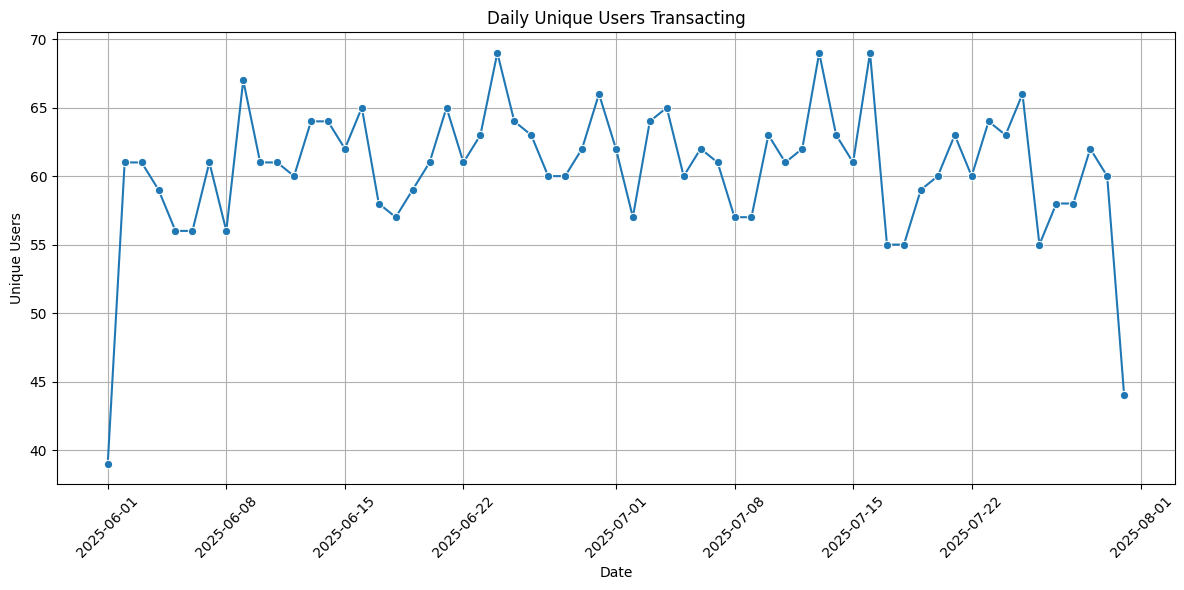

In [90]:
plot_series()

In [91]:
data.head(2)

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm


Check if users are often associated with different devices or location

In [92]:
# Group by user and count unique devices
user_device_counts = data.groupby('user_id')['device'].nunique().reset_index()
user_device_counts.columns = ['user_id', 'unique_device_count']

# Filter for users with >1 device
multi_device_users = user_device_counts[user_device_counts['unique_device_count'] > 1]

In [93]:
multi_device_users.sort_values('unique_device_count')

,user_id,unique_device_count
1,user1001,6
59,user1072,6
0,user1000,7
61,user1074,7
60,user1073,7
...,...,...
25,user1028,7
24,user1027,7
23,user1026,7
31,user1035,7


In [94]:
# Group by user and count unique devices                                           
user_location_counts = data.groupby('user_id')['location'].nunique().reset_index() 
user_location_counts.columns = ['user_id', 'user_location_counts']                  
                                                                                   
# Filter for users with > 1 device 
multi_location_users = user_location_counts[user_location_counts['user_location_counts'] > 1] 
multi_location_users.sort_values('user_location_counts')

,user_id,user_location_counts
0,user1000,8
61,user1074,8
60,user1073,8
59,user1072,8
58,user1071,8
...,...,...
25,user1028,8
24,user1027,8
23,user1026,8
31,user1035,8


In [95]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN
...,...,...,...,...,...,...,...,...,...
7769,user1000 2025-07-31 09:41:19 withdrawal 966.27...,user1000,2025-07-31 09:41:19,withdrawal,966.27,none,glasgow,xiaomi mi 11,NaN
7770,usr:user1077|deposit|€730.81|leeds|2025-07-31 ...,user1077,2025-07-31 09:48:20,deposit,730.81,€,leeds,none,NaN
7771,2025-07-31 09:50:41 | user: user1043 | txn: to...,user1043,2025-07-31 09:50:41,top-up,4718.76,$,liverpool,nokia 3310,NaN
7772,2025-07-31 10:20:49 | user: user1087 | txn: tr...,user1087,2025-07-31 10:20:49,transfer,3756.03,€,manchester,iphone 13,NaN


# Engineer user focused featuers

Explore the possibility of aggregating daily transactions by unique user

In [96]:
data['date'] = data['timestamp'].dt.date 

In [97]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm,date
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN,2025-06-01
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm,2025-06-01
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN,2025-06-01
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN,2025-06-01
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN,2025-06-01
...,...,...,...,...,...,...,...,...,...,...
7769,user1000 2025-07-31 09:41:19 withdrawal 966.27...,user1000,2025-07-31 09:41:19,withdrawal,966.27,none,glasgow,xiaomi mi 11,NaN,2025-07-31
7770,usr:user1077|deposit|€730.81|leeds|2025-07-31 ...,user1077,2025-07-31 09:48:20,deposit,730.81,€,leeds,none,NaN,2025-07-31
7771,2025-07-31 09:50:41 | user: user1043 | txn: to...,user1043,2025-07-31 09:50:41,top-up,4718.76,$,liverpool,nokia 3310,NaN,2025-07-31
7772,2025-07-31 10:20:49 | user: user1087 | txn: tr...,user1087,2025-07-31 10:20:49,transfer,3756.03,€,manchester,iphone 13,NaN,2025-07-31


Convert all currencies to Dollars

In [98]:
def convert_to_dollars(amount, currency):
    if currency == '€':
        amount_dollars = amount * 1.6
        return amount_dollars
    elif currency == '£':
        amount_dollars = amount * 1.33
        return amount_dollars 
    else:
        return amount

In [99]:
data['amount_in_dollars'] = data.apply(lambda row: convert_to_dollars(row['amount'], row['currency']), axis=1)

In [100]:
data.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm,date,amount_in_dollars
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN,2025-06-01,6814.8000
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm,2025-06-01,2981.2100
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN,2025-06-01,5933.6753
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN,2025-06-01,2575.6600
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN,2025-06-01,3949.9800


In [101]:
data.dtypes

raw_log                      object
user_id                      object
timestamp            datetime64[ns]
action                       object
amount                      float64
currency                     object
location                     object
device                       object
atm                          object
date                         object
amount_in_dollars           float64
dtype: object

In [102]:
data['date'] = pd.to_datetime(data['date'])

In [103]:
# Ensure timestamp is datetime
data.dtypes

raw_log                      object
user_id                      object
timestamp            datetime64[ns]
action                       object
amount                      float64
currency                     object
location                     object
device                       object
atm                          object
date                 datetime64[ns]
amount_in_dollars           float64
dtype: object

In [104]:
# testing groupby
data.groupby(['date', 'user_id']).agg({
        'amount_in_dollars': ['sum', ('mode', lambda x:  x.mode()[0] if not x.mode().empty else None)],
        'currency': 'sum'
        })


amount_in_dollars           currency
                                  sum      mode      sum
date       user_id                                      
2025-06-01 user1000          5009.482  2028.272       $€
           user1001          4517.800  4517.800     none
           user1003          1108.760  1108.760     none
           user1008           860.320   860.320     none
           user1011          2312.560  2312.560        $
...                               ...       ...      ...
2025-07-31 user1092           890.880   890.880     none
           user1093          3096.800   132.640    €none
           user1094          1802.496  1802.496        €
           user1095          1523.600  1523.600        $
           user1096          1720.760  1720.760        $

[3696 rows x 3 columns]

In [105]:
# Define aggregation functions
agg_funcs = {
    'amount_in_dollars': [
            ('total_amount', 'sum'), 
            ('average_amount', 'mean'), 
            ('std_amount','std'),
            ('total_transactions', 'count')
            ],
            
    'currency': [
        ('most_used_currency', lambda x: x.mode()[0] if not x.mode().empty else None),
        ('total_currencies', 'nunique')
    ],
    'location': [
        ('most_used_location', lambda x: x.mode()[0] if not x.mode().empty else None),
        ('total_locations', 'nunique')
    ],
    'device': [
        ('most_used_device', lambda x: x.mode()[0] if not x.mode().empty else None),
        ('total_devices', 'nunique')
    ],
    'action': [
        ('most_performed_action', lambda x: x.mode()[0] if not x.mode().empty else None),
        ('total_action_types', 'nunique')
    ]
}


In [106]:
# Group by date and user
daily_user_stats = data.groupby(['date', 'user_id']).agg(agg_funcs)

In [107]:
daily_user_stats

amount_in_dollars                              \
                         total_amount average_amount   std_amount   
date       user_id                                                  
2025-06-01 user1000          5009.482       2504.741   673.828922   
           user1001          4517.800       4517.800          NaN   
           user1003          1108.760       1108.760          NaN   
           user1008           860.320        860.320          NaN   
           user1011          2312.560       2312.560          NaN   
...                               ...            ...          ...   
2025-07-31 user1092           890.880        890.880          NaN   
           user1093          3096.800       1548.400  2002.186993   
           user1094          1802.496       1802.496          NaN   
           user1095          1523.600       1523.600          NaN   
           user1096          1720.760       1720.760          NaN   

                                                 currency                   \
                    total_transactions most_used_currency total_currencies   
date       user_id                                                           
2025-06-01 user1000                  2                  $                2   
           user1001                  1               none                1   
           user1003                  1               none                1   
           user1008                  1               none                1   
           user1011                  1                  $                1   
...                                ...                ...              ...   
2025-07-31 user1092                  1               none                1   
           user1093                  2               none                2   
           user1094                  1                  €                1   
           user1095                  1                  $                1   
           user1096                  1                  $                1   

                              location                              device  \
                    most_used_location total_locations    most_used_device   
date       user_id                                                           
2025-06-01 user1000             london               2  samsung galaxy s10   
           user1001            cardiff               1                none   
           user1003            glasgow               1          huawei p30   
           user1008          liverpool               1        xiaomi mi 11   
           user1011          liverpool               1             pixel 6   
...                                ...             ...                 ...   
2025-07-31 user1092               none               1          nokia 3310   
           user1093              leeds               2          huawei p30   
           user1094         manchester               1             pixel 6   
           user1095         manchester               1          nokia 3310   
           user1096         birmingham               1          nokia 3310   

                                                 action                     
                    total_devices most_performed_action total_action_types  
date       user_id                                                          
2025-06-01 user1000             2               cashout                  2  
           user1001             1               cashout                  1  
           user1003             1                refund                  1  
           user1008             1               cashout                  1  
           user1011             1                refund                  1  
...                           ...                   ...                ...  
2025-07-31 user1092             1                top-up                  1  
           user1093             2              transfer                  2  
           user1094 

In [108]:
daily_user_stats.columns = daily_user_stats.columns.get_level_values(1)

In [109]:
daily_user_stats

total_amount  average_amount   std_amount  \
date       user_id                                               
2025-06-01 user1000      5009.482        2504.741   673.828922   
           user1001      4517.800        4517.800          NaN   
           user1003      1108.760        1108.760          NaN   
           user1008       860.320         860.320          NaN   
           user1011      2312.560        2312.560          NaN   
...                           ...             ...          ...   
2025-07-31 user1092       890.880         890.880          NaN   
           user1093      3096.800        1548.400  2002.186993   
           user1094      1802.496        1802.496          NaN   
           user1095      1523.600        1523.600          NaN   
           user1096      1720.760        1720.760          NaN   

                     total_transactions most_used_currency  total_currencies  \
date       user_id                                                             
2025-06-01 user1000                   2                  $                 2   
           user1001                   1               none                 1   
           user1003                   1               none                 1   
           user1008                   1               none                 1   
           user1011                   1                  $                 1   
...                                 ...                ...               ...   
2025-07-31 user1092                   1               none                 1   
           user1093                   2               none                 2   
           user1094                   1                  €                 1   
           user1095                   1                  $                 1   
           user1096                   1                  $                 1   

                    most_used_location  total_locations    most_used_device  \
date       user_id                                                            
2025-06-01 user1000             london                2  samsung galaxy s10   
           user1001            cardiff                1                none   
           user1003            glasgow                1          huawei p30   
           user1008          liverpool                1        xiaomi mi 11   
           user1011          liverpool                1             pixel 6   
...                                ...              ...                 ...   
2025-07-31 user1092               none                1          nokia 3310   
           user1093              leeds                2          huawei p30   
           user1094         manchester                1             pixel 6   
           user1095         manchester                1          nokia 3310   
           user1096         birmingham                1          nokia 3310   

                     total_devices most_performed_action  total_action_types  
date       user_id                                                            
2025-06-01 user1000              2               cashout                   2  
           user1001              1               cashout                   1  
           user1003              1                refund                   1  
           user1008              1               cashout                   1  
           user1011              1                refund                   1  
...                            ...                   ...                 ...  
2025-07-31 user1092              1                top-up                   1  
           user1093              2              transfer                   2  
           user1094              1              purchase                   1  
           user1095              1              transfer                   1  
           user1096              1                refund                   1  

[3696 rows x 12 columns]

In [110]:
df = daily_user_stats.reset_index()

In [111]:
df.head()

,date,user_id,total_amount,average_amount,std_amount,total_transactions,most_used_currency,total_currencies,most_used_location,total_locations,most_used_device,total_devices,most_performed_action,total_action_types
0,2025-06-01,user1000,5009.482,2504.741,673.828922,2,$,2,london,2,samsung galaxy s10,2,cashout,2
1,2025-06-01,user1001,4517.800,4517.800,NaN,1,none,1,cardiff,1,none,1,cashout,1
2,2025-06-01,user1003,1108.760,1108.760,NaN,1,none,1,glasgow,1,huawei p30,1,refund,1
3,2025-06-01,user1008,860.320,860.320,NaN,1,none,1,liverpool,1,xiaomi mi 11,1,cashout,1
4,2025-06-01,user1011,2312.560,2312.560,NaN,1,$,1,liverpool,1,pixel 6,1,refund,1


In [112]:
df.shape

(3696, 14)

In [113]:
df[(df['total_currencies'] == 1) & (df['most_used_currency'] == 'none')]

,date,user_id,total_amount,average_amount,std_amount,total_transactions,most_used_currency,total_currencies,most_used_location,total_locations,most_used_device,total_devices,most_performed_action,total_action_types
1,2025-06-01,user1001,4517.80,4517.80,NaN,1,none,1,cardiff,1,none,1,cashout,1
2,2025-06-01,user1003,1108.76,1108.76,NaN,1,none,1,glasgow,1,huawei p30,1,refund,1
3,2025-06-01,user1008,860.32,860.32,NaN,1,none,1,liverpool,1,xiaomi mi 11,1,cashout,1
9,2025-06-01,user1027,1715.68,857.84,24.126483,2,none,1,leeds,2,nokia 3310,2,purchase,2
13,2025-06-01,user1034,7244.26,3622.13,1528.651724,2,none,1,liverpool,1,none,2,top-up,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,2025-07-31,user1064,4155.78,4155.78,NaN,1,none,1,cardiff,1,iphone 13,1,transfer,1
3685,2025-07-31,user1080,5772.54,2886.27,2948.875694,2,none,1,leeds,2,huawei p30,2,debit,2
3689,2025-07-31,user1089,2118.28,2118.28,NaN,1,none,1,glasgow,1,huawei p30,1,cashout,1
3690,2025-07-31,user1090,3914.00,3914.00,NaN,1,none,1,glasgow,1,samsung galaxy s10,1,debit,1


# Engineer Transaction focused features

In [114]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm,date,amount_in_dollars
0,usr:user1093|withdrawal|€4259.25|cardiff|2025-...,user1093,2025-06-01 11:41:41,withdrawal,4259.25,€,cardiff,none,NaN,2025-06-01,6814.8000
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm,2025-06-01,2981.2100
2,usr:user1019|purchase|£4461.41|cardiff|2025-06...,user1019,2025-06-01 12:14:07,purchase,4461.41,£,cardiff,huawei p30,NaN,2025-06-01,5933.6753
3,2025-06-01 12:44:19::user1048::deposit::2575.6...,user1048,2025-06-01 12:44:19,deposit,2575.66,none,leeds,iphone 13,NaN,2025-06-01,2575.6600
4,01/06/2025 12:48:18 ::: user1014 *** refund ::...,user1014,2025-06-01 12:48:18,refund,3949.98,$,none,huawei p30,NaN,2025-06-01,3949.9800
...,...,...,...,...,...,...,...,...,...,...,...
7769,user1000 2025-07-31 09:41:19 withdrawal 966.27...,user1000,2025-07-31 09:41:19,withdrawal,966.27,none,glasgow,xiaomi mi 11,NaN,2025-07-31,966.2700
7770,usr:user1077|deposit|€730.81|leeds|2025-07-31 ...,user1077,2025-07-31 09:48:20,deposit,730.81,€,leeds,none,NaN,2025-07-31,1169.2960
7771,2025-07-31 09:50:41 | user: user1043 | txn: to...,user1043,2025-07-31 09:50:41,top-up,4718.76,$,liverpool,nokia 3310,NaN,2025-07-31,4718.7600
7772,2025-07-31 10:20:49 | user: user1087 | txn: tr...,user1087,2025-07-31 10:20:49,transfer,3756.03,€,manchester,iphone 13,NaN,2025-07-31,6009.6480


In [115]:
transaction_df = data.copy()

In [116]:
# Ensure the column is in datetime format
transaction_df['timestamp'] = pd.to_datetime(transaction_df['timestamp'])

# Extract components
transaction_df['hour'] = transaction_df['timestamp'].dt.hour
transaction_df['day'] = transaction_df['timestamp'].dt.day
transaction_df['month'] = transaction_df['timestamp'].dt.month
transaction_df['year'] = transaction_df['timestamp'].dt.year

# sort values
transaction_df = transaction_df.sort_values(['user_id', 'timestamp'])

In [117]:
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm,date,amount_in_dollars,hour,day,month,year
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm,2025-06-01,2981.2100,12,1,6,2025
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,NaN,2025-06-01,2028.2720,19,1,6,2025
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,NaN,2025-06-02,3610.6800,19,2,6,2025
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,atm,2025-06-03,6196.5498,10,3,6,2025
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,NaN,2025-06-03,5405.0801,21,3,6,2025


In [118]:
# Get time difference between transactions
transaction_df['txn_time_diff_hours'] = (
                                            transaction_df.groupby('user_id')['timestamp']
                                            .diff()
                                            .dt.total_seconds() / 3600
                                        )

# fill missing value with -1 to indicate first transaction of the user. if 0 was used the algorithm would think it's 0 hour btw previous transaction.
transaction_df['txn_time_diff_hours'] = transaction_df['txn_time_diff_hours'].fillna(-1)

In [119]:
# Check if current location is same as previous
transaction_df['prev_location'] = transaction_df.groupby('user_id')['location'].shift()

# Create feature: is_same_location
transaction_df['is_same_location'] = transaction_df['location'] == transaction_df['prev_location']
transaction_df = transaction_df.drop(['prev_location'], axis=1)

In [120]:
transaction_df

,raw_log,user_id,timestamp,action,amount,currency,location,device,atm,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,atm,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,NaN,2025-06-01,2028.2720,19,1,6,2025,7.271944,False
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,NaN,2025-06-02,3610.6800,19,2,6,2025,24.548333,False
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,atm,2025-06-03,6196.5498,10,3,6,2025,14.319167,False
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,NaN,2025-06-03,5405.0801,21,3,6,2025,11.193611,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,user1099 2025-07-24 14:45:45 refund 1420.36 li...,user1099,2025-07-24 14:45:45,refund,1420.36,none,liverpool,none,NaN,2025-07-24,1420.3600,14,24,7,2025,148.348333,True
7022,2025-07-25 10:04:10 | user: user1099 | txn: de...,user1099,2025-07-25 10:04:10,debit,2847.84,€,none,pixel 6,NaN,2025-07-25,4556.5440,10,25,7,2025,19.306944,False
7073,2025-07-25 18:10:43::user1099::refund::2876.11...,user1099,2025-07-25 18:10:43,refund,2876.11,none,birmingham,iphone 13,NaN,2025-07-25,2876.1100,18,25,7,2025,8.109167,False
7281,2025-07-27 11:55:14 - user=user1099 - action=d...,user1099,2025-07-27 11:55:14,debit,1299.55,€,none,iphone 13,atm,2025-07-27,2079.2800,11,27,7,2025,41.741944,False


Create ATM flag i.e true or flase

In [121]:
transaction_df['is_atm'] = transaction_df['atm'].apply(lambda x: True if x == 'atm' else False)

# drop atm column
transaction_df = transaction_df.drop(['atm'], axis=1)

Lable transaction types based on risk level

In [122]:
transaction_df['action'].unique()

array(['cashout', 'debit', 'refund', 'withdrawal', 'deposit', 'top-up',
       'purchase', 'transfer'], dtype=object)

In [123]:
transaction_risk_map = {
    "cashout": "high",
    "withdrawal": "high",
    "refund": "high",
    "transfer": "high",
    "debit": "moderate",
    "purchase": "moderate",
    "deposit": "low",
    "top-up": "low"
}


In [124]:
transaction_df['transaction_risk'] = transaction_df['action'].map(transaction_risk_map)

Identify if device is smart phone or not

In [125]:
transaction_df['device'].unique()

array(['samsung galaxy s10', 'xiaomi mi 11', 'huawei p30', 'nokia 3310',
       'none', 'pixel 6', 'iphone 13'], dtype=object)

In [126]:
phone_map = {
  "samsung galaxy s10": "smart",
  "xiaomi mi 11": "smart",
  "huawei p30": "smart",
  "pixel 6": "smart",
  "iphone 13": "smart",
  "nokia 3310": "non-smart",
  "none": "non-smart"
}


In [127]:
transaction_df['device_type'] = transaction_df['device'].map(phone_map)

In [128]:
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart


check if device is same as previous device or not

In [129]:
# Check if current location is same as previous
transaction_df['prev_device'] = transaction_df.groupby('user_id')['device'].shift()

# Create feature: is_same_location
transaction_df['is_same_device'] = transaction_df['location'] == transaction_df['prev_device']
transaction_df = transaction_df.drop(['prev_device'], axis=1)

In [130]:
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart,False
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart,False
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart,False
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart,False
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart,False


Create feature to flag late night and early mornings as high risk hours

In [131]:
transaction_df['hour_risk'] = transaction_df['hour'].apply(lambda x: 'High' if x <= 6 or x >= 22 else 'Low')

In [132]:
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart,False,Low
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart,False,Low
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart,False,Low
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart,False,Low
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart,False,Low


In [133]:
transaction_df.columns

Index(['raw_log', 'user_id', 'timestamp', 'action', 'amount', 'currency',
       'location', 'device', 'date', 'amount_in_dollars', 'hour', 'day',
       'month', 'year', 'txn_time_diff_hours', 'is_same_location', 'is_atm',
       'transaction_risk', 'device_type', 'is_same_device', 'hour_risk'],
      dtype='object')

In [134]:
transaction_df.dtypes

raw_log                        object
user_id                        object
timestamp              datetime64[ns]
action                         object
amount                        float64
currency                       object
location                       object
device                         object
date                   datetime64[ns]
amount_in_dollars             float64
hour                            int32
day                             int32
month                           int32
year                            int32
txn_time_diff_hours           float64
is_same_location                 bool
is_atm                           bool
transaction_risk               object
device_type                    object
is_same_device                   bool
hour_risk                      object
dtype: object

In [135]:
for col in transaction_df.columns.to_list():
    print(col, ">>>>>", transaction_df[col].nunique())

raw_log >>>>> 7774
user_id >>>>> 86
timestamp >>>>> 7771
action >>>>> 8
amount >>>>> 7709
currency >>>>> 4
location >>>>> 8
device >>>>> 7
date >>>>> 61
amount_in_dollars >>>>> 7746
hour >>>>> 24
day >>>>> 31
month >>>>> 2
year >>>>> 1
txn_time_diff_hours >>>>> 7392
is_same_location >>>>> 2
is_atm >>>>> 2
transaction_risk >>>>> 3
device_type >>>>> 2
is_same_device >>>>> 2
hour_risk >>>>> 2


Create a feature that shows the average amount the user transacts before a particular transaction

In [136]:
transaction_df = transaction_df.sort_values(by=['user_id', 'timestamp'])
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart,False,Low
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart,False,Low
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart,False,Low
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart,False,Low
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart,False,Low


In [137]:
transaction_df['avg_prev_amount'] = (transaction_df.groupby(['user_id'])['amount_in_dollars']
                                    .apply(lambda x: x.shift().expanding().mean())
                                    .reset_index(level=0,drop=True)
                                    .fillna(transaction_df['amount_in_dollars']))

In [138]:
transaction_df[['user_id', 'timestamp','amount_in_dollars', 'avg_prev_amount']]

,user_id,timestamp,amount_in_dollars,avg_prev_amount
1,user1000,2025-06-01 12:03:31,2981.2100,2981.210000
28,user1000,2025-06-01 19:19:50,2028.2720,2981.210000
163,user1000,2025-06-02 19:52:44,3610.6800,2504.741000
246,user1000,2025-06-03 10:11:53,6196.5498,2873.387333
308,user1000,2025-06-03 21:23:30,5405.0801,3704.177950
...,...,...,...,...
6919,user1099,2025-07-24 14:45:45,1420.3600,2610.405450
7022,user1099,2025-07-25 10:04:10,4556.5440,2578.242059
7073,user1099,2025-07-25 18:10:43,2876.1100,2630.302637
7281,user1099,2025-07-27 11:55:14,2079.2800,2636.605390


Calculate difference between current transaction and previous average

In [139]:
transaction_df['amount_difference_from_avg'] = transaction_df['amount_in_dollars'] - transaction_df['avg_prev_amount']

In [140]:
transaction_df.head()

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
1,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000
28,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000
163,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000
246,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467
308,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150


Save dataset

In [141]:
transaction_df.to_csv('../fraud_tools_team_ds_test/model_ready_data.csv', index=False)